<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


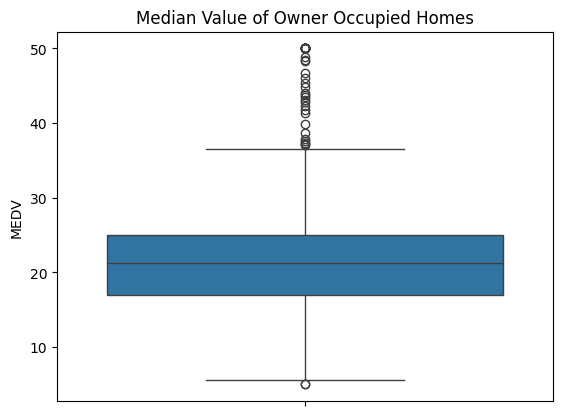

In [6]:
sns.boxplot(boston_df['MEDV']).set_title('Median Value of Owner Occupied Homes');

**Conclusion:** The median value of owner occupied homes is around $21,000.

([<matplotlib.axis.XTick at 0xb24ee20>, <matplotlib.axis.XTick at 0xb282f10>],
 [Text(0.0, 0, 'Not Near River'), Text(1.0, 0, 'Near River')])

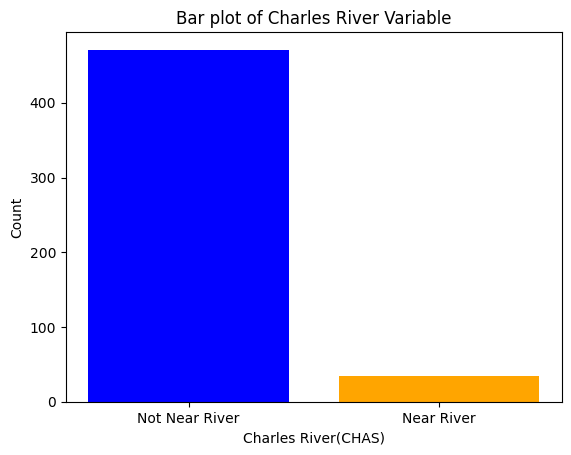

In [28]:
chas_counts = boston_df['CHAS'].value_counts()

pyplot.bar(chas_counts.index, chas_counts.values, color=['blue', 'orange'])
pyplot.title('Bar plot of Charles River Variable')
pyplot.xlabel('Charles River(CHAS)')
pyplot.ylabel('Count')
pyplot.xticks(chas_counts.index, labels=['Not Near River', 'Near River'])

**Conclusion:** The bar plot suggests that the majority of the houses are present away from the Charles River border.

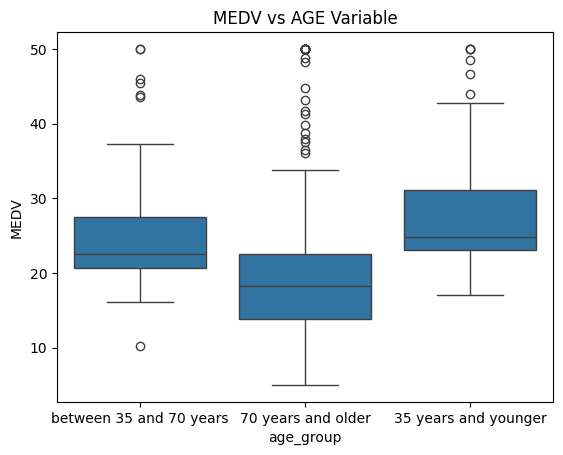

In [8]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df).set_title('MEDV vs AGE Variable');

**Conclusion:** As per the box plot, the prices seem to be going down as the house gets older.

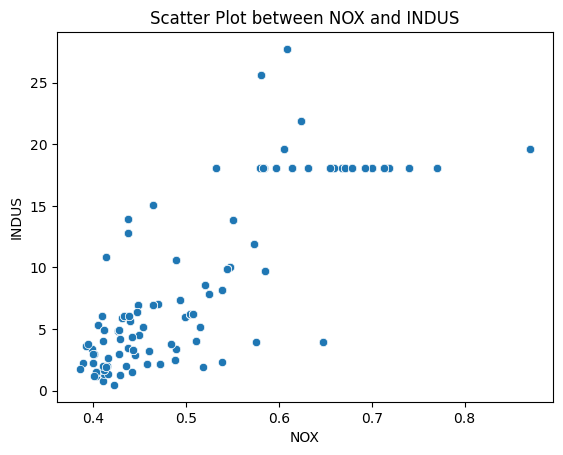

In [9]:
sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df).set_title('Scatter Plot between NOX and INDUS');

**Conclusion:** The lower proportion of non retail business acres per town had lower nitric oxide concentrations

<ipython-input-10-a9fe47a0d3b9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df['PTRATIO']).set_title('Histogram for Pupil to Teacher Ratio');


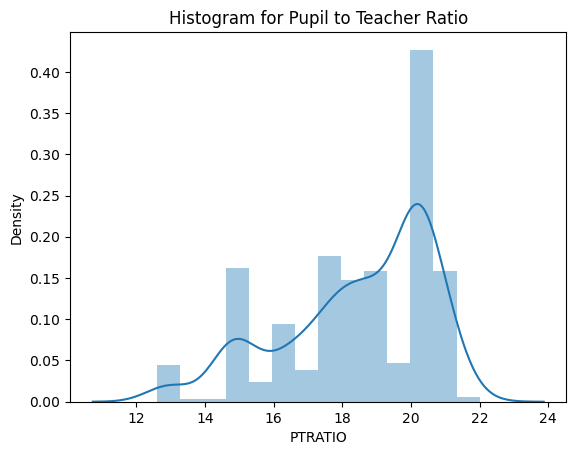

In [10]:
sns.distplot(boston_df['PTRATIO']).set_title('Histogram for Pupil to Teacher Ratio');

**Conclusion:** The majority of pupil to teacher ratio is around 20.

**T-test**  
H0:µ1=µ2 ('There is no significant difference in median value of houses bounded by the Charles River')  
H1:µ1≠µ2 ('There is a significant difference in median value of houses bounded by the Charles River')  
α = 0.05

In [11]:
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

In [12]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

TtestResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305, df=1010.0)

**Conclusion**: As the p-value is less than 0.05, we reject the null hypothesis, meaning that there is a significant difference in the median value of houses bounded by the Charles River.

**ANOVA**  
H0:µ1=µ2=µ3 ('Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE) are equal')  
H1: Atleast one median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE) is different  
Test for equality of variance

In [19]:
scipy.stats.f_oneway(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'], 
                    boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                    boston_df[boston_df['age_group'] == '70 years and older']['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Conclusion**: As the p-value is less than 0.05, we reject the null hypothesis, meaning that there is a statistical difference in the median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940(AGE).

**Pearson Correlation**  
H0: There is no relationship between Nitric oxide concentrations and proportion of non business retail acres per town  
H1: There is a rletaionship between Nitric oxide concentrations and proportion of non business retail acres per town 

In [20]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conlusion:** As the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non business retail acres per town.

**Regression Analysis**  
H0: There is no impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes.  
H1: There is an impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes

In [21]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        04:35:22   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p-value is less than 0.05 so we reject the null hypothesis as there is evidence that there is an impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes.